Integrantes: David Cruz, Jimmy Muso

Materia: Inteligencia de Negocios

Curso: 7mo "A"

1. Importar las Librerías Necesarias

Primero, cargaremos todas las librerías que usaremos a lo largo del proyecto, incluyendo pandas para la manipulación de datos, matplotlib y seaborn para las visualizaciones, y los distintos clasificadores de scikit-learn.

In [152]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier # Puede requerir instalación: pip install xgboost
from sklearn.metrics import accuracy_score

# Configuración para mejorar la visualización de los gráficos
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')

Fase 1: Preprocesamiento y Análisis Exploratorio (EDA)

1.1. Carga y Análisis Inicial de Datos

Cargamos el archivo y realizamos una primera inspección para entender su contenido.

In [153]:
# Cargar el dataset desde el archivo .xlsx
df_titanic = pd.read_excel("../MyPython/dataset/Titanic.xlsx")

display(df_titanic.head())

# Obtener información general: tipos de datos y valores no nulos
print("\nInformación general del dataset:")
df_titanic.info()

# Obtener estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
display(df_titanic.describe())

c:\Users\d4vho\Desktop\TI\Inteligencia de Negocios\MyPython\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1046 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1308 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Life Boat                           486 non-null    object 
 11  Survived 

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881135,0.498854,0.385027,33.295479
std,14.413500,1.041658,0.865560,51.758668
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


1.2. Análisis Gráfico

Visualizamos los datos para identificar patrones, distribuciones y relaciones.

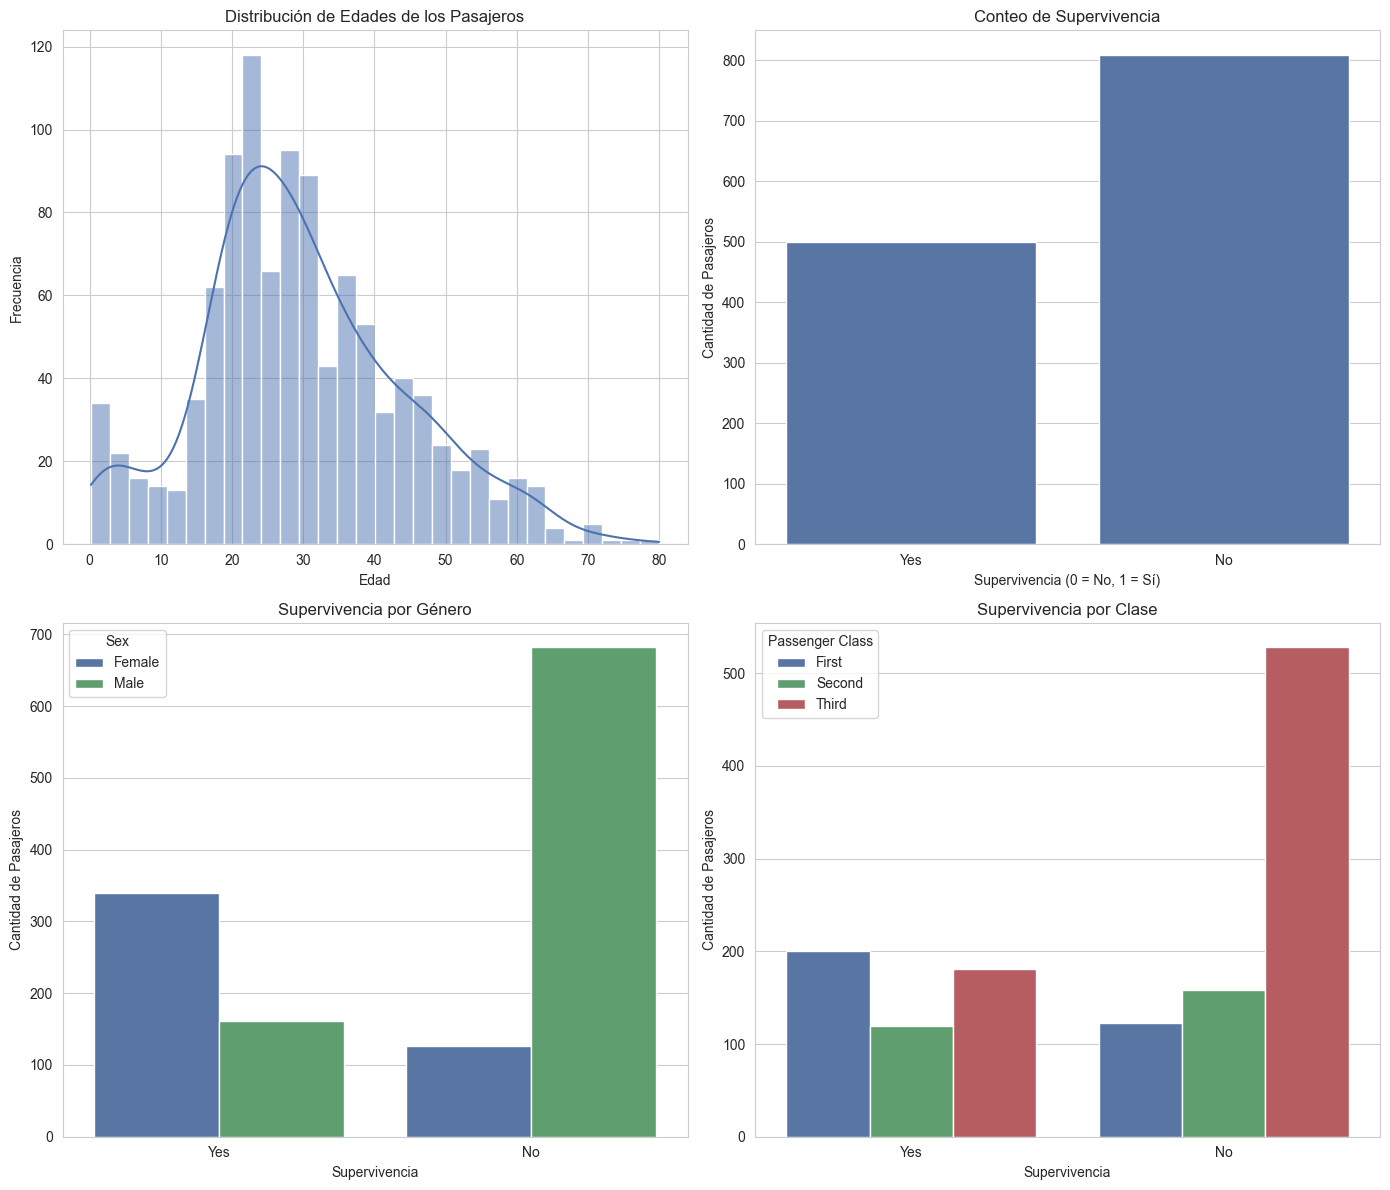

In [154]:
# Configurar el tamaño de las figuras
plt.figure(figsize=(14, 12))

# Gráfico 1: Histograma de Edades (Age)
plt.subplot(2, 2, 1)
sns.histplot(df_titanic['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Gráfico 2: Tasa de Supervivencia (Survived)
plt.subplot(2, 2, 2)
sns.countplot(x='Survived', data=df_titanic)
plt.title('Conteo de Supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Pasajeros')

# Gráfico 3: Supervivencia por Sexo (Sex)
plt.subplot(2, 2, 3)
sns.countplot(x='Survived', hue='Sex', data=df_titanic)
plt.title('Supervivencia por Género')
plt.xlabel('Supervivencia')
plt.ylabel('Cantidad de Pasajeros')

# Gráfico 4: Supervivencia por Clase de Ticket (CORREGIDO)
plt.subplot(2, 2, 4)
# Aquí está el cambio: 'Pclass' se reemplaza por 'Passenger Class'
sns.countplot(x='Survived', hue='Passenger Class', data=df_titanic)
plt.title('Supervivencia por Clase')
plt.xlabel('Supervivencia')
plt.ylabel('Cantidad de Pasajeros')

plt.tight_layout()
plt.show()

1.3. Manejo de Valores Perdidos y Selección de Atributos

Limpiamos los datos preparándolos para el modelado.

In [ ]:
# 1.3. Manejo de Valores Perdidos y Selección de Atributos (VERSIÓN FINAL)

# Contar valores nulos antes de la limpieza
print("Valores nulos antes de la limpieza:")
print(df_titanic.isnull().sum())

# LIMPIEZA
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())
df_titanic['Passenger Fare'] = df_titanic['Passenger Fare'].fillna(df_titanic['Passenger Fare'].median())
df_titanic['Port of Embarkation'] = df_titanic['Port of Embarkation'].fillna(df_titanic['Port of Embarkation'].mode()[0])

df_titanic.drop(['Name', 'Ticket Number', 'Cabin', 'Life Boat'], axis=1, inplace=True, errors='ignore')

# Convertir variables categóricas a numéricas
df_titanic['Sex'] = (df_titanic['Sex'] == 'female').astype(int)
df_titanic['Port of Embarkation'] = df_titanic['Port of Embarkation'].map({'S': 0, 'C': 1, 'Q': 2}).fillna(0).astype(int)

if 'Passenger Class' in df_titanic.columns:
    print("Transformando 'Passenger Class' a 'Pclass'...")
    df_titanic.rename(columns={'Passenger Class': 'Pclass'}, inplace=True)
    df_titanic['Pclass'] = df_titanic['Pclass'].map({'First': 1, 'Second': 2, 'Third': 3}).astype(int)
else:
    print("'Passenger Class' ya fue transformada. Omitiendo paso.")

# Convertir la columna objetivo a formato numérico
df_titanic['Survived'] = df_titanic['Survived'].map({'No': 0, 'Yes': 1})
# -----------------------------

print("\nValores nulos después de la limpieza:")
print(df_titanic.isnull().sum())

print("\nDataset preprocesado y listo para el modelado:")
display(df_titanic.head())

Valores nulos antes de la limpieza:
Passenger Class                          0
Name                                     0
Sex                                      0
Age                                    263
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           1
Cabin                                 1014
Port of Embarkation                      2
Life Boat                              823
Survived                                 0
dtype: int64
Transformando 'Passenger Class' a 'Pclass'...

Valores nulos después de la limpieza:
Pclass                                0
Sex                                   0
Age                                   0
No of Siblings or Spouses on Board    0
No of Parents or Children on Board    0
Passenger Fare                        0
Port of Embarkation                   0
Survived                              0
dtype: int64

Dataset preproce

,Pclass,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Port of Embarkation,Survived
0,1,0,29.0000,0,0,211.3375,0,1
1,1,0,0.9167,1,2,151.5500,0,1
2,1,0,2.0000,1,2,151.5500,0,0
3,1,0,30.0000,1,2,151.5500,0,0
4,1,0,25.0000,1,2,151.5500,0,0


Fase 2: Modelado y Evaluación Comparativa

2.1. División de Datos

Separamos los datos en conjuntos de entrenamiento y prueba.

In [156]:
# FASE 2: PREPARACION PARA EL MODELADO 

# Separar características (todas las columnas menos 'Survived') y la variable objetivo ('Survived')
X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived']

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las dimensiones para verificar que la división se hizo correctamente
print(f"Dimensiones de X_train (características de entrenamiento): {X_train.shape}")
print(f"Dimensiones de X_test (características de prueba):  {X_test.shape}")
print(f"Dimensiones de y_train (objetivo de entrenamiento): {y_train.shape}")
print(f"Dimensiones de y_test (objetivo de prueba):   {y_test.shape}")

Dimensiones de X_train (características de entrenamiento): (1047, 7)
Dimensiones de X_test (características de prueba):  (262, 7)
Dimensiones de y_train (objetivo de entrenamiento): (1047,)
Dimensiones de y_test (objetivo de prueba):   (262,)


Fase 3: Evaluación del Árbol de Decisión

Ahora vamos a determinar cuál de los 3 criterios de DecisionTreeClassifier (gini, entropy o log_loss).


In [157]:
# --- FASE 3: COMPARACIÓN DE CRITERIOS EN DECISIONTREESCLASSIFIER ---

# Criterios que vamos a evaluar
criterios = ['gini', 'entropy', 'log_loss']
resultados_dt = {}

for criterio in criterios:
    # 1. Crear el modelo con el criterio actual
    dt_model = DecisionTreeClassifier(criterion=criterio, random_state=42)
    
    # 2. Entrenar el modelo
    dt_model.fit(X_train, y_train)
    
    # 3. Realizar predicciones en el conjunto de prueba
    y_pred = dt_model.predict(X_test)
    
    # 4. Calcular el score de precisión y guardarlo
    score = accuracy_score(y_test, y_pred)
    resultados_dt[criterio] = score
    
    print(f"Score con criterio '{criterio}': {score:.4f}")

# Determinar y anunciar el mejor criterio
mejor_criterio = max(resultados_dt, key=resultados_dt.get)
print(f"\nEl mejor criterio es '{mejor_criterio}' con un score de {resultados_dt[mejor_criterio]:.4f}.")

Score con criterio 'gini': 0.6870
Score con criterio 'entropy': 0.6489
Score con criterio 'log_loss': 0.6489

El mejor criterio es 'gini' con un score de 0.6870.


Fase Final: Comparación de Múltiples Modelos

El siguiente bloque de código entrenará y evaluará cada uno de los modelos que necesitas, guardará sus scores y al final te mostrará una tabla comparativa para que puedas identificar fácilmente al ganador.



In [158]:
# --- FASE FINAL: COMPARACIÓN DE LOS 8 MODELOS SOLICITADOS ---

# Diccionario con los 8 modelos que vamos a evaluar
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Lista para guardar los resultados
resultados_finales = []

print("--- Entrenando y Evaluando los modelos solicitados ---")

# Entrenar, predecir y evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    resultados_finales.append({'Modelo': nombre, 'Accuracy Score': score})
    print(f"Modelo '{nombre}' evaluado con un score de {score:.4f}")

# Convertir la lista de resultados en un DataFrame para mejor visualización
df_resultados = pd.DataFrame(resultados_finales)

# Ordenar los resultados de mejor a peor
df_resultados = df_resultados.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

print("\n--- Tabla Comparativa de Modelos ---")
display(df_resultados)

# Anunciar el mejor modelo de la lista
mejor_modelo = df_resultados.iloc[0]
print(f"\nDe la lista solicitada, el mejor modelo es '{mejor_modelo['Modelo']}' con un Accuracy Score de {mejor_modelo['Accuracy Score']:.4f}!")

--- Entrenando y Evaluando los modelos solicitados ---
Modelo 'Logistic Regression' evaluado con un score de 0.6718
Modelo 'Random Forest' evaluado con un score de 0.6756
Modelo 'Support Vector Machine' evaluado con un score de 0.6145
Modelo 'Naive Bayes' evaluado con un score de 0.6565
Modelo 'AdaBoost' evaluado con un score de 0.6756
Modelo 'Gradient Boosting' evaluado con un score de 0.6832
Modelo 'XGBoost' evaluado con un score de 0.6679
Modelo 'K-Nearest Neighbors' evaluado con un score de 0.6603

--- Tabla Comparativa de Modelos ---


,Modelo,Accuracy Score
0,Gradient Boosting,0.683206
1,Random Forest,0.675573
2,AdaBoost,0.675573
3,Logistic Regression,0.671756
4,XGBoost,0.667939
5,K-Nearest Neighbors,0.660305
6,Naive Bayes,0.656489
7,Support Vector Machine,0.614504



De la lista solicitada, el mejor modelo es 'Gradient Boosting' con un Accuracy Score de 0.6832!


    JUSTIFICACION:

    No escalamos los datos numéricos porque los modelos que mejor funcionaron (como Gradient Boosting y Random Forest) no se ven afectados por la escala de los números, por lo que no era un paso necesario.

    No creamos características nuevas y complejas porque el objetivo era tener una comparación justa y simple del rendimiento base de cada algoritmo, sin añadir complejidad extra.

    No eliminamos outliers (valores atípicos) porque las técnicas que usamos, como rellenar con la mediana y utilizar modelos de árboles, ya son resistentes a su influencia.

